<h1>Intro to Data Science by Blueprint</h1>

In [22]:
# Show plots in this notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import itertools
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm # statsmodels for linear regression
import geopandas as gpd # data processing with geospatial data

from sklearn import preprocessing # data preprocessing

# Setting plot parameters
from pylab import rcParams
params = {
    'figure.figsize': (12, 8),
    'legend.fontsize': 15
}
rcParams.update(params)

# Hide code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
df = pd.read_csv('data/2016.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
X = df.iloc[:,6:]
y = df['Happiness Score']

In [5]:
scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
y = scaler.fit_transform(y.reshape(-1, 1))

In [6]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     728.3
Date:                Wed, 05 Jul 2017   Prob (F-statistic):          2.33e-112
Time:                        00:57:09   Log-Likelihood:                 139.15
No. Observations:                 157   AIC:                            -264.3
Df Residuals:                     150   BIC:                            -242.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy (GDP per Capita)          0.3385      0.076      4.479      0.000       0.189       0.488
Family                            0.0995      0.050      1.980      0.050       0.000       0.199
Health (Life Expectancy)          0.1663      0.063      2.620      0.010       0.041       0.292
Freedom                           0.0659      0.045      1.470      0.144      -0.023       0.154
Trust (Government Corruption)     0.1385      0.045      3.107      0.002       0.050       0.227
Generosity                       -0.0728      0.054     -1.357      0.177      -0.179       0.033
Dystopia Residual                 0.3218      0.038      8.411      0.000       0.246       0.397
==============================================================================
Omnibus:                        5.215   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.958
Skew:                           0.091   Prob(JB):                        0.228
Kurtosis:                       2.353   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h2>Important Features</h2>

Economy GDP per Capita, Health Life Expectancy, Dystopia Residual are main indicators in determining happiness

<h1>World Data</h1>

In [7]:
# adding linewidth parameter
def plot_polygon(ax, poly, facecolor='red', edgecolor='black', alpha=0.5, linewidth=1):
    """ Plot a single Polygon geometry """
    from descartes.patch import PolygonPatch
    a = np.asarray(poly.exterior)
    # without Descartes, we could make a Patch of exterior
    ax.add_patch(PolygonPatch(poly, facecolor=facecolor, alpha=alpha))
    ax.plot(a[:, 0], a[:, 1], color=edgecolor, linewidth=linewidth)
    for p in poly.interiors:
        x, y = zip(*p.coords)
        ax.plot(x, y, color=edgecolor, linewidth=linewidth)

def plot_multipolygon(ax, geom, facecolor='red', edgecolor='black', alpha=0.5, linewidth=1):
    """ Can safely call with either Polygon or Multipolygon geometry
    """
    if geom.type == 'Polygon':
        plot_polygon(ax, geom, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, linewidth=linewidth)
    elif geom.type == 'MultiPolygon':
        for poly in geom.geoms:
            plot_polygon(ax, poly, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, linewidth=linewidth)

            
import numpy as np
from geopandas.plotting import (plot_linestring, plot_point, norm_cmap)


def plot_dataframe(s, column=None, colormap=None, alpha=0.5,
                   categorical=False, legend=False, axes=None, scheme=None,
                   k=5, linewidth=1):
    """ Plot a GeoDataFrame

        Generate a plot of a GeoDataFrame with matplotlib.  If a
        column is specified, the plot coloring will be based on values
        in that column.  Otherwise, a categorical plot of the
        geometries in the `geometry` column will be generated.

        Parameters
        ----------

        GeoDataFrame
            The GeoDataFrame to be plotted.  Currently Polygon,
            MultiPolygon, LineString, MultiLineString and Point
            geometries can be plotted.

        column : str (default None)
            The name of the column to be plotted.

        categorical : bool (default False)
            If False, colormap will reflect numerical values of the
            column being plotted.  For non-numerical columns (or if
            column=None), this will be set to True.

        colormap : str (default 'Set1')
            The name of a colormap recognized by matplotlib.

        alpha : float (default 0.5)
            Alpha value for polygon fill regions.  Has no effect for
            lines or points.

        legend : bool (default False)
            Plot a legend (Experimental; currently for categorical
            plots only)

        axes : matplotlib.pyplot.Artist (default None)
            axes on which to draw the plot

        scheme : pysal.esda.mapclassify.Map_Classifier
            Choropleth classification schemes

        k   : int (default 5)
            Number of classes (ignored if scheme is None)


        Returns
        -------

        matplotlib axes instance
    """
    import matplotlib.pyplot as plt
    from matplotlib.lines import Line2D
    from matplotlib.colors import Normalize
    from matplotlib import cm
    
    if column is None:
        return plot_series(s.geometry, colormap=colormap, alpha=alpha, axes=axes)
    else:
        categorical = True
        if categorical:
            if colormap is None:
                colormap = 'Set1'
            categories = list(set(s[column].values))
            categories.sort()
            valuemap = dict([(k, v) for (v, k) in enumerate(categories)])
            values = [valuemap[k] for k in s[column]]
        else:
            values = s[column]
        if scheme is not None:
            binning = __pysal_choro(values, scheme, k=k)
            values = binning.yb
            # set categorical to True for creating the legend
            categorical = True
            binedges = [binning.yb.min()] + binning.bins.tolist()
            categories = ['{0:.2f} - {1:.2f}'.format(binedges[i], binedges[i+1]) for i in range(len(binedges)-1)]
        cmap = norm_cmap(values, colormap, Normalize, cm)
        if axes == None:
            fig = plt.gcf()
            fig.add_subplot(111, aspect='equal')
            ax = plt.gca()
        else:
            ax = axes
        for geom, value in zip(s.geometry, values):
            if geom.type == 'Polygon' or geom.type == 'MultiPolygon':
                plot_multipolygon(ax, geom, facecolor=cmap.to_rgba(value), alpha=alpha, linewidth=linewidth)
            elif geom.type == 'LineString' or geom.type == 'MultiLineString':
                plot_multilinestring(ax, geom, color=cmap.to_rgba(value))
            # TODO: color point geometries
            elif geom.type == 'Point':
                plot_point(ax, geom, color=cmap.to_rgba(value))
        if legend:
            if categorical:
                patches = []
                size = len(categories)
                indices = [0, size / 4, size / 2, size / 4 * 3, size - 1]
                categories = [categories[i] for i in indices]
                for value, cat in zip(indices, categories):
                    patches.append(Line2D([0], [0], linestyle="none",
                                          marker="o", alpha=alpha,
                                          markersize=15, markerfacecolor=cmap.to_rgba(value)))
                ax.legend(patches, categories, numpoints=1, loc='best')
            else:
                # TODO: show a colorbar
                raise NotImplementedError

    return ax

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

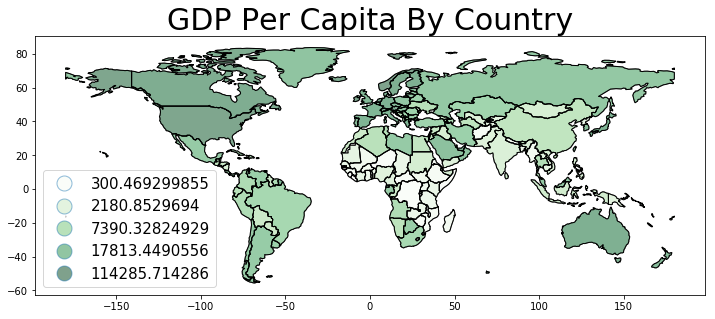

In [9]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est * 10 ** 6
plot_dataframe(world, column='gdp_per_cap', k=3, colormap='Greens', legend=True)
plt.title('GDP Per Capita By Country', fontsize=30)

In [10]:
world_happiness_df = df.merge(world, left_on='Country', right_on='name', how='inner')

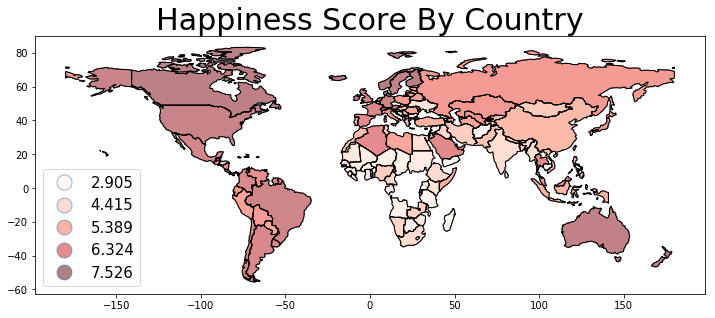

In [12]:
plot_dataframe(world_happiness_df, column='Happiness Score', k=3, colormap='Reds', legend=True)
plt.title('Happiness Score By Country', fontsize=30)

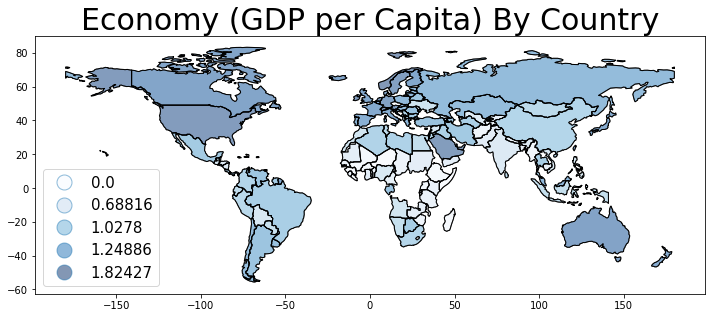

In [13]:
plot_dataframe(world_happiness_df, column='Economy (GDP per Capita)', k=3, colormap='Blues', legend=True)
plt.title('Economy (GDP per Capita) By Country', fontsize=30)

In [14]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [15]:
hover = HoverTool(tooltips=[
    ("Country", "@Country"),
    ("Happiness Score", "@happiness_score"),
    ("GDP Per Capita", "@gdp_per_cap"),
    ("Continent", "@continent"),
    ("Region", "@Region"),
])

p = figure(plot_width=600, plot_height=400, tools=[hover, 'pan' ,'box_zoom','reset', 'wheel_zoom'],
           title="Happiness vs GDP")

p.circle('Economy (GDP per Capita)', 'happiness_score', size=10, source=world_happiness_df.drop('geometry', axis=1).rename(columns={'Happiness Score': 'happiness_score'}))
show(p)

In [16]:
p = figure(plot_width=600, plot_height=400, tools=['pan' ,'box_zoom','reset', 'wheel_zoom'],
           title="Happiness vs GDP")

colors = itertools.cycle(["#3366cc", "#dc3912", "#ff9900", "#109618", "#990099", "#0099c6", "#dd4477", "#66aa00", "#b82e2e", "#316395", "#994499", "#22aa99", "#aaaa11", "#6633cc", "#e67300", "#8b0707", "#651067", "#329262", "#5574a6", "#3b3eac"])
for continent in list(set(world_happiness_df.continent)):
    t = (world_happiness_df
         .drop('geometry', axis=1)
         .rename(columns={'Happiness Score': 'happiness_score'}))
    t = t.loc[t['continent'] == continent]
    p.circle(t['Economy (GDP per Capita)'], t['happiness_score'], legend=continent, fill_color=colors.next(), size=10)
show(p)

In [17]:
happiness_by_continent_df = world_happiness_df.groupby('continent')['Happiness Score'].mean().reset_index()

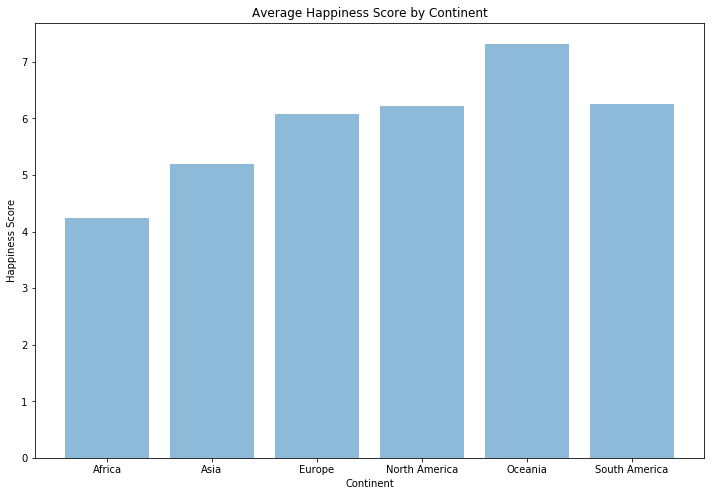

In [18]:
y_pos = np.arange(len(happiness_by_continent_df))

plt.bar(y_pos, happiness_by_continent_df['Happiness Score'], align='center', alpha=0.5)
plt.xticks(y_pos, happiness_by_continent_df['continent'])
plt.ylabel('Happiness Score')
plt.xlabel('Continent')
plt.title('Average Happiness Score by Continent')
 
plt.show()